In [2]:
cd drive/My\ Drive/ML_hw

/content/drive/My Drive/ML_hw


In [117]:
pwd

'/content/drive/My Drive/ML_hw'

In [118]:
import numpy as np
import copy
import random
import matplotlib.pyplot as plt

np.random.seed(0)

In [119]:
class NeuralNetwork:
    def __init__(self):
      self.w = 0.5
      self.b = 0.5

    def train(self, data, all_y_true, batchsize=4, epochs=10, lr=0.00001):
        n = len(data)
        y_preds = self.forward(data, self.w, self.b)
        lossVal = self._mse_loss(all_y_true, y_preds)
        data = copy.deepcopy(data)
        history = [lossVal]

        for epoch in range(1, epochs + 1):
            # print(all_y_true)
            dataset = list(zip(data, all_y_true))
            # print(dataset)
            random.shuffle(dataset)
            # print(dataset)

            n_batch = np.ceil(n / batchsize)
            for index in range(int(n_batch)):
                l_bound = index * batchsize
                r_bound = (index + 1) * batchsize

                if r_bound > n:
                    r_bound = n
                    l_bound = r_bound - batchsize

                x_batch = np.zeros((r_bound - l_bound, *data.shape[1:]))
                y_batch = np.zeros((r_bound - l_bound, *all_y_true.shape[1:]))

                instance_count = 0
                for x, y in dataset[l_bound: r_bound]:
                    x_batch[instance_count] = x
                    y_batch[instance_count] = y
                    instance_count += 1
                # print(x_batch.shape, y_batch.shape)
                j_diff_w, j_diff_b = self.grad(x_batch, y_batch)
                # print(j_diff_w, j_diff_b)

                self.w -= lr * j_diff_w
                self.b -= lr * j_diff_b

                # self.sgd(x_batch, y_batch, self.wb, lr=lr, loss=loss)

            if epoch % 10 == 0:
                y_preds = self.forward(data, self.w, self.b)
                lossVal = self._mse_loss(all_y_true, y_preds)
                print("Epoch %d \t loss: %.6f " % (epoch, lossVal))
                history.append(lossVal)
        return self.w, self.b, history

    # def _sigmoid(x):
    #     return 1 / (1 + np.exp(-1 * x))

    def forward(self, x, w, b):
        """
        前向传播
        """

        # sigmoid
        return x * w + b
        # return self._sigmoid(np.sum(x * w, axis=1) + b)


    def grad(self, x, y_true, d=1e-6):
      """
      求偏导
      """
      j_diff_w, j_diff_b = 0., 0.

      w, b = self.w, self.b
      print(w)
      
      # 求关于w的偏导
      o = self.forward(x, self.w, self.b)
      # print(y_true.shape, o.shape)
      loss = self._mse_loss(np.squeeze(y_true), np.squeeze(o))
      

      w = w + d
      o_ = self.forward(x, w, self.b)
      loss_ = self._mse_loss(np.squeeze(y_true), np.squeeze(o_))
      print(o_,o)
      print(o_ == o)
      j_diff_w = (loss_ - loss) / d
      w -= d
      
      b += d
      o_ = self.forward(x, self.w, b)
      loss_ = self._mse_loss(np.squeeze(y_true), np.squeeze(o_))
      j_diff_b = (loss_ - loss) / d


      return j_diff_w, j_diff_b


    def _mse_loss(self, y_true, y_pred):
        # print(y_true, y_pred)
        return ((y_true - y_pred) ** 2).mean()

    def sigmoid(x):
        return 1 / (1 + np.exp(-1 * x))
    
    def sigmoid_diff(x):
        return sigmoid(x) * (1 - sigmoid(x))

In [187]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
from sklearn.metrics import r2_score


In [183]:
def gen_data(sigma, n_train=500):
  x = np.arange(n_train, dtype=np.float64).reshape((n_train, 1))
  n = np.random.normal(0, sigma, 500).reshape((n_train, 1))
  y = x + n
  return x, y
# plt.scatter(x,y)

In [ ]:
model = Sequential()

model.add(Dense(1, input_dim=1)) #这个input_dim和input_shape一样，就是少了括号和逗号
# model.add(Dense(2, activation='relu'))
# model.add(Dense(1))
 
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer="rmsprop")
print(model.summary())


Epoch 1/10
500/500 [==============================] - 0s 74us/step - loss: 19.5354
Epoch 2/10
500/500 [==============================] - 0s 57us/step - loss: 6.2406
Epoch 3/10
500/500 [==============================] - 0s 55us/step - loss: 1.1359
Epoch 4/10
500/500 [==============================] - 0s 58us/step - loss: 1.0962
Epoch 5/10
500/500 [==============================] - 0s 57us/step - loss: 1.0880
Epoch 6/10
500/500 [==============================] - 0s 56us/step - loss: 1.1086
Epoch 7/10
500/500 [==============================] - 0s 55us/step - loss: 1.0933
Epoch 8/10
500/500 [==============================] - 0s 58us/step - loss: 1.1238
Epoch 9/10
500/500 [==============================] - 0s 63us/step - loss: 1.1065
Epoch 10/10
500/500 [==============================] - 0s 60us/step - loss: 1.0910
(500, 1)
Epoch 1/10
500/500 [==============================] - 0s 68us/step - loss: 2346.5506
Epoch 2/10
500/500 [==============================] - 0s 68us/step - loss: 2345.1429

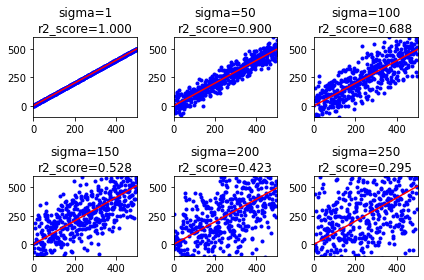

In [214]:
n_train = 500

for i, s in enumerate([1, 50, 100, 150, 200, 250]):
  x, y = gen_data(s, n_train)

  model.fit(x, y, 16, epochs=10)

  y_ln = model.predict(np.array([0, 500]))
  y_pr = model.predict(x)
  print(y_pr.shape)

  sc = r2_score(y.flatten(), y_pr.flatten())
  # print(sc)

  plt.subplot('23'+str(i+1))
  plt.title("sigma={}\nr2_score={:.3f}".format(s, sc))
  plt.xlim(0, n_train)
  plt.ylim(-100, 600)
  plt.scatter(x, y, c='b', marker='.')
  plt.plot([0, n_train],y_ln, 'r')
  plt.tight_layout()
plt.savefig('3_1.svg')

In [215]:
def gen_data2(sigma, n_train=500):
  x = np.arange(n_train, dtype=np.float64).reshape((n_train, 1))
  n = np.random.normal(0, sigma, 500).reshape((n_train, 1))
  y = x - n
  return x, y
# plt.scatter(x,y)

Epoch 1/10
500/500 [==============================] - 0s 66us/step - loss: 127.5583
Epoch 2/10
500/500 [==============================] - 0s 58us/step - loss: 31.9255
Epoch 3/10
500/500 [==============================] - 0s 56us/step - loss: 2.1834
Epoch 4/10
500/500 [==============================] - 0s 54us/step - loss: 1.0823
Epoch 5/10
500/500 [==============================] - 0s 65us/step - loss: 1.1133
Epoch 6/10
500/500 [==============================] - 0s 55us/step - loss: 1.1379
Epoch 7/10
500/500 [==============================] - 0s 57us/step - loss: 1.1022
Epoch 8/10
500/500 [==============================] - 0s 55us/step - loss: 1.1123
Epoch 9/10
500/500 [==============================] - 0s 56us/step - loss: 1.1210
Epoch 10/10
500/500 [==============================] - 0s 57us/step - loss: 1.1070
(500, 1)
Epoch 1/10
500/500 [==============================] - 0s 67us/step - loss: 2419.7746
Epoch 2/10
500/500 [==============================] - 0s 79us/step - loss: 2417.78

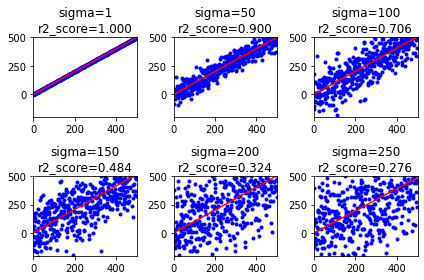

In [217]:
n_train = 500

for i, s in enumerate([1, 50, 100, 150, 200, 250]):
  x, y = gen_data2(s, n_train)

  model.fit(x, y, 16, epochs=10)

  y_ln = model.predict(np.array([0, 500]))
  y_pr = model.predict(x)
  print(y_pr.shape)

  sc = r2_score(y.flatten(), y_pr.flatten())
  # print(sc)

  plt.subplot('23'+str(i+1))
  plt.title("sigma={}\nr2_score={:.3f}".format(s, sc))
  plt.xlim(0, n_train)
  plt.ylim(-200, 500)
  plt.scatter(x, y, c='b', marker='.')
  plt.plot([0, n_train],y_ln, 'r')
  plt.tight_layout()
plt.savefig('3_2.svg')

Epoch 1/20
500/500 [==============================] - 0s 63us/step - loss: 2930.9345
Epoch 2/20
500/500 [==============================] - 0s 56us/step - loss: 2109.1190
Epoch 3/20
500/500 [==============================] - 0s 69us/step - loss: 1405.1887
Epoch 4/20
500/500 [==============================] - 0s 54us/step - loss: 852.1246
Epoch 5/20
500/500 [==============================] - 0s 59us/step - loss: 440.7700
Epoch 6/20
500/500 [==============================] - 0s 56us/step - loss: 176.0755
Epoch 7/20
500/500 [==============================] - 0s 56us/step - loss: 39.9278
Epoch 8/20
500/500 [==============================] - 0s 56us/step - loss: 3.5588
Epoch 9/20
500/500 [==============================] - 0s 57us/step - loss: 1.9299
Epoch 10/20
500/500 [==============================] - 0s 56us/step - loss: 1.9371
Epoch 11/20
500/500 [==============================] - 0s 54us/step - loss: 1.9178
Epoch 12/20
500/500 [==============================] - 0s 54us/step - loss: 1.90

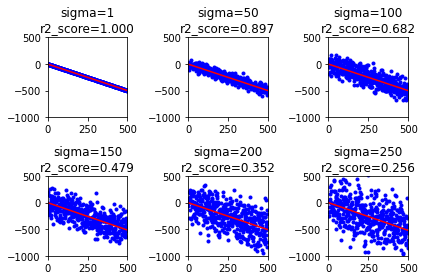

In [219]:
def gen_data3(sigma, n_train=500):
  x = np.arange(n_train, dtype=np.float64).reshape((n_train, 1))
  n = np.random.normal(0, sigma, 500).reshape((n_train, 1))
  y = -1 * x + n
  return x, y
# plt.scatter(x,y)
n_train = 500

for i, s in enumerate([1, 50, 100, 150, 200, 250]):
  x, y = gen_data3(s, n_train)

  model.fit(x, y, 16, epochs=20)

  y_ln = model.predict(np.array([0, 500]))
  y_pr = model.predict(x)
  print(y_pr.shape)

  sc = r2_score(y.flatten(), y_pr.flatten())
  # print(sc)

  plt.subplot('23'+str(i+1))
  plt.title("sigma={}\nr2_score={:.3f}".format(s, sc))
  plt.xlim(0, n_train)
  plt.ylim(-1000, 500)
  plt.scatter(x, y, c='b', marker='.')
  plt.plot([0, n_train],y_ln, 'r')
  plt.tight_layout()
plt.savefig('3_3.svg')